# Getting data from supermetrics

Follow tutorial https://supermetrics.com/blog/how-to-load-data-into-mysql

urls are stored in 'constants.py', which will not be pushed into the repo

In [1]:
import requests
import urllib.parse as up
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

import constants_MT

In [2]:
# import urls 
url_1month = constants_MT.url_1month
url_3months = constants_MT.url_3months
url_6months = constants_MT.url_6months
url_12months = constants_MT.url_12months
url_last3months = constants_MT.url_last3months
#print(url_1month)

In [3]:
# call API - necessary to access data 
response_1month = requests.get(url_1month)
response_3months = requests.get(url_3months)
response_6months = requests.get(url_6months)
response_12months = requests.get(url_12months)
response_last3months = requests.get(url_last3months)

In [4]:
# check response from supermetrics 
responses = [response_1month, response_3months, response_6months, response_12months, response_last3months]

for r in responses:
    print(r)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [5]:
# function to create dataframe from url data 
def url_to_df (url, response): 
    if 'data/json?' in url:
        # convert json into pandas df 
        data = json.loads(json.dumps(response.json()))
        df = pd.DataFrame.from_dict(data['data'])
        headers = df.iloc[0]
        df2 = pd.DataFrame(df.values[1:], columns=headers)
        #df2.head()
        #print(df2.head())
    elif 'data/keyjson?' in url:
        # CONVERT JSON KEY-VALUE PAIR OUTPUT TO PD DF
        df2 = pd.read_json(json.dumps(response.json()))
        #df2.head()
        #print(df2.head())
    else:
        # THROW EXCEPTION MESSAGE
        import sys
        sys.exit("DEFINE JSON OR KEYJSON AS OUTPUT FORMAT: https://supermetrics.com/docs/product-api-output-formats/")
    return df2     

In [6]:
# create dataframes of different time ranges 
df_1month = url_to_df(url_1month, response_1month)
df_3months = url_to_df(url_3months, response_3months)
df_6months = url_to_df(url_6months, response_6months)
df_12months = url_to_df(url_12months, response_12months)
df_last3months = url_to_df(url_last3months, response_last3months)

TODOS 
* descriptive analysis - table format? 
    - Clients per day/week/month 
    - Transactions per day/week/month 

In [7]:
# function to convert data to correct format
def transform_class (df):
    # to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # to numeric 
    df['Users'] = pd.to_numeric(df['Users'],errors = 'coerce')
    df['Transactions'] = pd.to_numeric(df['Transactions'],errors = 'coerce')
    df['Transaction revenue'] = pd.to_numeric(df['Transaction revenue'],errors = 'coerce')
    
    return (df)

In [8]:
df_1month = transform_class(df_1month)
df_3months = transform_class(df_3months)
df_6months = transform_class(df_6months)
df_12months = transform_class(df_12months)
df_last3months = transform_class(df_last3months)

# Descriptive analysis - deciding on time range to work with

Work with complete 2021 year -> df = df_12months

Very imbalanced dataset (as expected)

In [9]:
print("Number of clients in January 2021:", len(df_1month))
print("Number of transactions in January 2021:", sum(df_1month['Transactions']))

print("Number of clients in January-March 2021:", len(df_3months))
print("Number of transactions in January-March 2021:", sum(df_3months['Transactions']))

print("Number of clients in January-June 2021:", len(df_6months))
print("Number of transactions in January-June 2021:", sum(df_6months['Transactions']))

print("Number of clients in January-December 2021:", len(df_12months))
print("Number of transactions in January-December 2021:", sum(df_12months['Transactions']))

print("Number of clients in October-December 2021:", len(df_last3months))
print("Number of transactions in October-December 2021:", sum(df_last3months['Transactions']))

Number of clients in January 2021: 111074
Number of transactions in January 2021: 683
Number of clients in January-March 2021: 168709
Number of transactions in January-March 2021: 1340
Number of clients in January-June 2021: 267157
Number of transactions in January-June 2021: 2233
Number of clients in January-December 2021: 442104
Number of transactions in January-December 2021: 7651
Number of clients in October-December 2021: 129384
Number of transactions in October-December 2021: 4638


In [10]:
df = df_12months

TODO 
* Annotation of following plot would be nice - indicating if some specific marketing campaigns existed on observed peaks
* Also add title, etc

Attention! 
* Number of transactions != number of client IDs with transactions (more than one transaction may exist)

In [52]:
test1 = df.clientID.value_counts()
print('Total number of rows (client IDs, new or repeated):', len(df))
print('Total number of distinct client IDs:', len(test1))
print('Avg number of clientIDs per day:', round(len(df)/365, 2))

Total number of rows (client IDs, new or repeated): 442104
Total number of distinct client IDs: 323353
Avg number of clientIDs per day: 1211.0


In [53]:
print('Total number of transactions: ', df['Transactions'].sum())
print('Avg number of transactions per day:', round(df['Transactions'].sum()/365, 2))
df_transactions = df[df['Transactions'] > 0]
print('Total number of clientIDs with transactions:', len(df_transactions.clientID.value_counts()))
df_transactions_over1 = df[df['Transactions'] > 1]
print('Total number of clientIDs with more than 1 transaction:', len(df_transactions_over1.clientID.value_counts()))

Total number of transactions:  7651
Avg number of transactions per day: 20.96
Total number of clientIDs with transactions: 6616
Total number of clientIDs with more than 1 transaction: 382


In [47]:
# ----- ONGOING

print('Number of transactions from clientID that appear just once:')
print('Number of transactions from clientIDs that appear more than once:')

Number of transactions from clientID that appear just once:
Number of transactions from clientIDs that appear more than once:


TODO - se following code 

In [ ]:
# calculate for the whole year 2021
# Number of new/old users - from Supermetrics
# Number of transactions from new/old users 

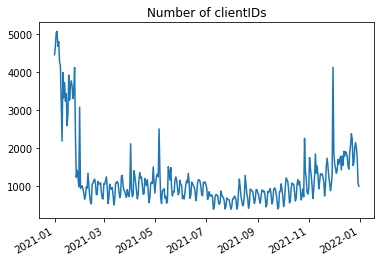

In [11]:
# extract clients per day = number of rows  
df['Date'].value_counts().plot()
plt.title("Number of clientIDs")
plt.show()

Something weird is happening on a single day in December

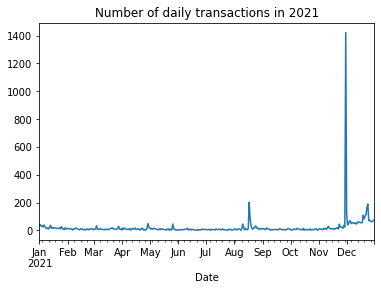

In [30]:
# extract number of transactions = sum of transactions per day
df.groupby(['Date'])['Transactions'].sum().plot()
plt.title('Number of daily transactions in 2021')
plt.show()

In [13]:
df2 = df[['Date', 'Transactions']]
df2 = df2.groupby(['Date'])['Transactions'].sum()

# 30.11.2021 1421 transactions exist. 
df2[df2 > 1000]

Date
2021-11-30    1421
Name: Transactions, dtype: int64

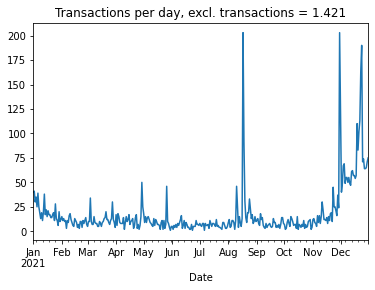

In [14]:
max(df2[df2 < 1000])
# substitute 1421 transactions with next max. value (203)
df2[df2 > 1000] = 203 
df2.plot()
plt.title('Transactions per day, excl. transactions = 1.421')
plt.show()


In [15]:
#print("transactions on 01.01.2021: ", len(df1.loc[(df1['Date'] == "2021-01-01") & (df1['Transactions'] >1)]))
#print("transactions on 02.01.2021:", len(df1[(df1['Date'] == "2021-01-02") & (df1['Transactions'] > 1)]))
#print("transactions on 03.01.2021:", len(df1[(df1['Date'] == "2021-01-03") & (df1['Transactions'] >=1)]))

In [16]:
# as reference, import data from 2020 and check number of daily transactions 
url_12months_2020 = constants_MT.url_12months_2020
response_12months_2020 = requests.get(url_12months_2020)
df_12months_2020 = url_to_df(url_12months_2020, response_12months_2020)
df_12months_2020 = transform_class(df_12months_2020)

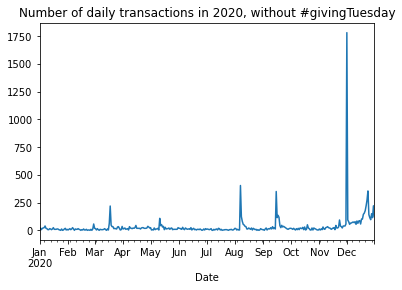

In [34]:
# check general trend in 2020 
df3 = df_12months_2020[['Date', 'Transactions']]
df3 = df3.groupby(['Date'])['Transactions'].sum()
df3.plot()
plt.title('Number of daily transactions in 2020, including #givingTuesday')
plt.show()

In [37]:
max(df3[df3 < 1000])
# substitute number of transactions in GivingTuesday with next max. value 
df3[df3 > 1000] = 404

In [ ]:
# check trend in 2020 without #givingTuesday 
df3 = df_12months_2020[['Date', 'Transactions']]
df3 = df3.groupby(['Date'])['Transactions'].sum()
df3.plot()
plt.title('Number of daily transactions in 2020, including #givingTuesday')
plt.show()

In 2020, the date with highest number of transactions of the year is 01.12.2020. As a reminder, that date was 30.11 in 2021. 

**That correspond to #givingTuesday 2020 (01.12) and 2021 (30.11)** 

TODO 
* Figure out if we should get rid of information/transactions on giving Tuesday - or just study the behavior on that specific day vs rest of days 
* Figure out if some other special marketing campaigns exist during the year and try to consider if they may have an effect on the analysis 
* Consider if substituting number of transactions in giving tuesday with value of second peak makes any sense 

In [29]:
df3[df3 > 1000]

Date
2020-12-01    1782
Name: Transactions, dtype: int64

In [33]:
df[df['Date'] == '30.11.2021']

c:\Users\carol\OneDrive\Escritorio\FH Kufstein\MT\analysis\python\venv_mt\lib\site-packages\pandas\core\arraylike.py:40: UserWarning: Parsing '30.11.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.eq)


,clientID,Date,Channel group,Users,Transactions,Transaction revenue
384814,780848.1638289758,2021-11-30,Email,1,1,79.2334
384815,909937.1636656983,2021-11-30,Email,1,1,21.1289
384816,1949950.1638258402,2021-11-30,Email,1,1,79.2334
384817,2073168.1638281792,2021-11-30,Generic Paid Search,1,0,0.0000
384818,2136460.1638305839,2021-11-30,Email,1,0,0.0000
...,...,...,...,...,...,...
388926,2043942088.1637656260,2021-11-30,Direct,1,0,0.0000
388927,2044422961.1638290305,2021-11-30,Email,1,1,264.1113
388928,2045311519.1608800768,2021-11-30,Email,1,1,105.6445
388929,2045356680.1630611955,2021-11-30,Organic Search,1,0,0.0000
